In [2]:
import numpy as np
import gudhi
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    # "font.sans-serif": ["Helvetica"]
    })
gudhi.persistence_graphical_tools._gudhi_matplotlib_use_tex=True

In [3]:
print(gudhi.__debug_info__)

Pybind11 version 2.10.4 
Python version 3.10.11
Cython version 0.29.34 
Numpy version 1.21.6 
Eigen3 version 3.4.0
Boost version 1.81.0
CGAL header only version 5.5.2
GMP_LIBRARIES = /Users/runner/work/gudhi-devel/gudhi-devel/deps-uni/lib/libgmp.dylib
GMPXX_LIBRARIES = /Users/runner/work/gudhi-devel/gudhi-devel/deps-uni/lib/libgmpxx.dylib
MPFR_LIBRARIES = /Users/runner/work/gudhi-devel/gudhi-devel/deps-uni/lib/libmpfr.dylib



In [4]:
# Example connectivity matrix (replace with your own data)
# This should be a symmetric matrix with connectivity strengths

TEST_PATH = "/Users/h1de0us/uni/mer-eeg-analysis/data/deap_filtered/s01_plv.npy"

# read .npy file
connectivity_matrix = np.load(TEST_PATH)
connectivity_matrix.shape

(32, 32, 5)

In [5]:
# working only with gamma band
connectivity_matrix = connectivity_matrix[:, :, -1]
connectivity_matrix.shape

(32, 32)

In [6]:
distance_matrix = 1 - np.abs(connectivity_matrix)
distance_matrix

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.42196415, 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.66958137, 0.43528857, 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.71370683, 0.71746194, 0.72716256, ..., 1.        , 1.        ,
        1.        ],
       [0.65893838, 0.43962584, 0.39929292, ..., 0.72267486, 1.        ,
        1.        ],
       [0.62253995, 0.54531807, 0.56604293, ..., 0.74371374, 0.28350736,
        1.        ]])

In [7]:
rips_complex = gudhi.RipsComplex(distance_matrix=distance_matrix, max_edge_length=1.0)

simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
result_str = 'Rips complex is of dimension ' + repr(simplex_tree.dimension()) + ' - ' + \
    repr(simplex_tree.num_simplices()) + ' simplices - ' + \
    repr(simplex_tree.num_vertices()) + ' vertices.'
print(result_str)
# fmt = '%s -> %.2f'
# for filtered_value in simplex_tree.get_filtration():
#     print(fmt % tuple(filtered_value))

Rips complex is of dimension 2 - 5488 simplices - 32 vertices.


In [8]:
filtration = simplex_tree.get_filtration()
filtration

In [9]:
persistence = simplex_tree.persistence()
persistence

[(1, (0.45211858511263714, 0.6674069658725955)),
 (1, (0.5037070382643477, 0.6621152032115813)),
 (1, (0.6175971785732884, 0.7509883744968675)),
 (1, (0.6067741087894327, 0.7020174489350461)),
 (1, (0.5046996900065577, 0.5866215454877354)),
 (1, (0.6211225100448762, 0.6849811649557613)),
 (1, (0.6629262185716426, 0.7195358454268717)),
 (1, (0.6417818097764889, 0.6871940209454808)),
 (1, (0.559820989911017, 0.5927027689019072)),
 (1, (0.6430962044033393, 0.6675957955381353)),
 (1, (0.48943659653850446, 0.5077078395595)),
 (1, (0.5231199631376021, 0.5406775585552615)),
 (1, (0.6580187166930576, 0.6675957955381353)),
 (1, (0.3917974369744288, 0.4012548895502208)),
 (1, (0.6120431218766713, 0.6213716955761059)),
 (1, (0.41814055771812, 0.42380421904967047)),
 (1, (0.6631896949163292, 0.6647067503666337)),
 (1, (0.404517208062669, 0.40525015831193545)),
 (0, (0.0, inf)),
 (0, (0.0, 0.6228932602142732)),
 (0, (0.0, 0.607808185368524)),
 (0, (0.0, 0.5413293548758782)),
 (0, (0.0, 0.5412904718

/Users/h1de0us/.pyenv/versions/3.10.13/envs/coursework/lib/python3.10/site-packages/gudhi/persistence_graphical_tools.py:105: UserWarning: This function is not available.
ModuleNotFoundError: No module named 'matplotlib'.
  warnings.warn(f"This function is not available.\nModuleNotFoundError: No module named '{import_error.name}'.")


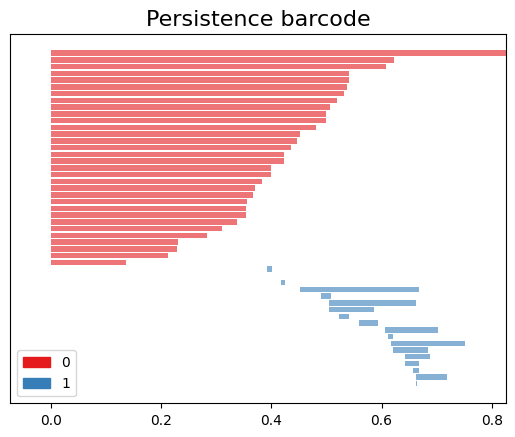

In [10]:
ax = gudhi.plot_persistence_barcode(persistence)

plt.show()

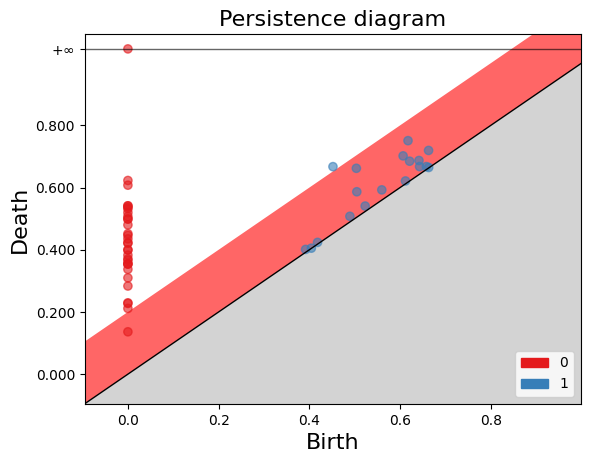

In [11]:
gudhi.plot_persistence_diagram(persistence, band=0.2)
plt.show()

Show barcode and diagram persistence side by side example


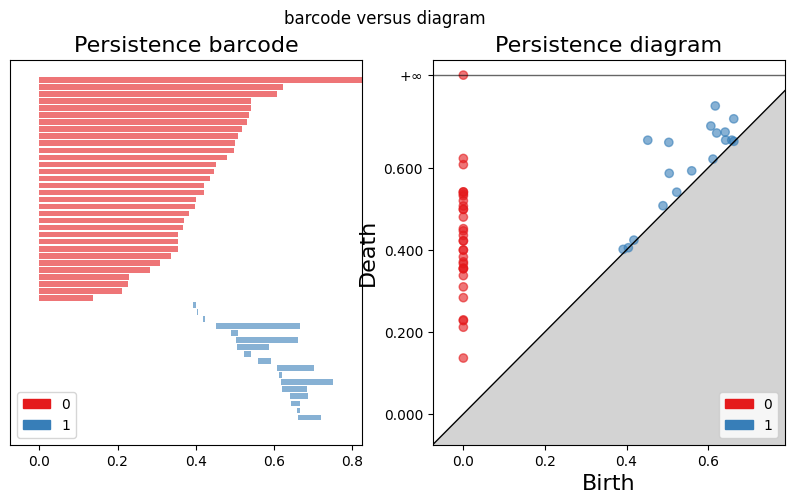

In [12]:
print("Show barcode and diagram persistence side by side example")
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
gudhi.plot_persistence_barcode(persistence, axes = axs[0])
gudhi.plot_persistence_diagram(persistence, axes = axs[1]) 
fig.suptitle("barcode versus diagram")
plt.show()

### Another method of calculating distance matrix (via https://link.springer.com/article/10.1007/s00521-024-09479-3)

In [13]:
distance_matrix = 1 / np.abs(connectivity_matrix)
distance_matrix

/var/folders/bb/tmb7sh8j2g735xnvcwh9yc7w0000gn/T/ipykernel_7223/3836576062.py:1: RuntimeWarning: divide by zero encountered in divide
  distance_matrix = 1 / np.abs(connectivity_matrix)


array([[       inf,        inf,        inf, ...,        inf,        inf,
               inf],
       [1.72999651,        inf,        inf, ...,        inf,        inf,
               inf],
       [3.02646376, 1.77081593,        inf, ...,        inf,        inf,
               inf],
       ...,
       [3.49292296, 3.53934613, 3.66518611, ...,        inf,        inf,
               inf],
       [2.93202149, 1.78452197, 1.66470486, ..., 3.60587573,        inf,
               inf],
       [2.64928701, 2.19933964, 2.3043754 , ..., 3.90188685, 1.39568776,
               inf]])

In [14]:
rips_complex = gudhi.RipsComplex(distance_matrix=distance_matrix, max_edge_length=float('inf')) # including all edges

simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
result_str = 'Rips complex is of dimension ' + repr(simplex_tree.dimension()) + ' - ' + \
    repr(simplex_tree.num_simplices()) + ' simplices - ' + \
    repr(simplex_tree.num_vertices()) + ' vertices.'
print(result_str)

Rips complex is of dimension 2 - 5488 simplices - 32 vertices.


In [15]:
persistence = simplex_tree.persistence()
persistence

[(1, (2.6150434671718354, 4.015876760691321)),
 (1, (1.825212487278085, 3.006677522948168)),
 (1, (2.0149389112889424, 2.959588621639563)),
 (1, (2.543067540444617, 3.355901197657782)),
 (1, (2.9667095309593003, 3.5655180303594176)),
 (1, (2.639375593726735, 3.1744133643931747)),
 (1, (2.791594696450361, 3.1968698393252555)),
 (1, (2.0189771333138067, 2.419090760740968)),
 (1, (2.801875497928597, 3.008385533567237)),
 (1, (2.2718030098660273, 2.4552094236043596)),
 (1, (2.924136637917867, 3.008385533567237)),
 (1, (2.0969634346185613, 2.177119839506711)),
 (1, (1.9586206007329228, 2.031314086141868)),
 (1, (2.5776060598211825, 2.6411126382153625)),
 (1, (1.6441890593577722, 1.6701597767517415)),
 (1, (1.7186281210429393, 1.7355212118191545)),
 (1, (2.9690302965984934, 2.982463861391399)),
 (1, (1.6793096518316195, 1.6813791781124707)),
 (0, (0.0, inf)),
 (0, (0.0, 2.6517691000914034)),
 (0, (0.0, 2.549772745613399)),
 (0, (0.0, 2.180213647048173)),
 (0, (0.0, 2.180028838974381)),
 (0, 

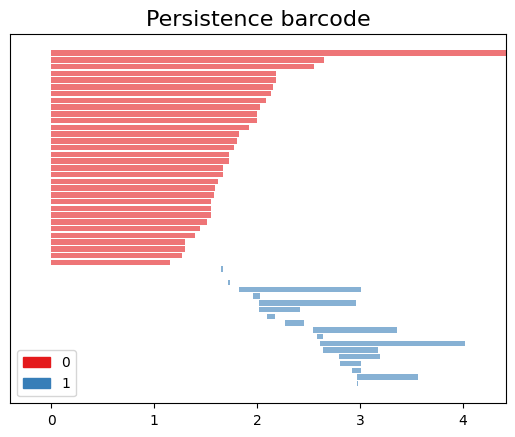

In [16]:
ax = gudhi.plot_persistence_barcode(persistence)

plt.show()